In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
import time
import os
import sys
sys.path.append('../../')

from data.processing import get_data

import models

from main.seir.fitting import single_fitting_cycle
from main.seir.forecast import get_forecast, forecast_all_trials, create_all_trials_csv, create_decile_csv_new
from main.seir.sensitivity import calculate_sensitivity_and_plot
from utils.generic.create_report import save_dict_and_create_report
from utils.generic.config import read_config
from utils.generic.enums import Columns
from utils.fitting.loss import Loss_Calculator
#from utils.generic.logging import log_wandb
from viz import plot_forecast, plot_top_k_trials, plot_ptiles

import yaml

In [3]:
from os.path import exists, join, splitext

In [4]:
config_filename = 'uncer.yaml'
config1 = read_config(config_filename)
config2 = read_config('default.yaml')

Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_20112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0            | 241935.0            | 243169.0   

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 8/1500 [00:00<00:20, 73.29it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.195872348927264,
    'I_hosp_ratio': 1.1843184079578213,
    'P_fatal': 1.1035746012767347,
    'T_inc': 1.0696324619558208,
    'T_inf': 1.7140468008483571,
    'T_recov': 1.2315746426555036,
    'T_recov_fatal': 1.144448694637641,
    'lockdown_R0': 1.2415491485408756,
    'sigma': 4.777465775078508}


100%|██████████| 1500/1500 [00:16<00:00, 92.71it/s] 


best parameters
 OrderedDict([('lockdown_R0', 0.7276964262017283), ('T_inc', 4.355464508194955), ('T_inf', 3.0275030657820574), ('T_recov', 11.462350476905915), ('T_recov_fatal', 6.000975445676251), ('P_fatal', 0.012206317536795274), ('E_hosp_ratio', 0.44100339605984235), ('I_hosp_ratio', 0.2780151648018659), ('sigma', 1.1526727979803804)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_20112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharash

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 500/500 [00:13<00:00, 37.35trial/s, best loss: 1.054873852361201] 
best parameters
 {'E_hosp_ratio': 0.00349941900139566, 'I_hosp_ratio': 0.46307883185949256, 'P_fatal': 0.027198641930728375, 'T_inc': 4.133926016680663, 'T_inf': 3.176977722034284, 'T_recov': 11.280849323821005, 'T_recov_fatal': 20.90055934853606, 'lockdown_R0': 1.0442762305018767}


15it [00:00, 141.40it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 139.38it/s]
14it [00:00, 136.57it/s]

getting forecasts ..
getting forecasts ..


500it [00:03, 132.20it/s]


> /Users/avtansht/Desktop/Wadhwani/covid-modelling/main/seir/uncertainty/middleclass.py(203)find_beta()
-> variable_param_ranges[key] = getattr(hp, variable_param_ranges[key][1])(


(Pdb)  variable_param_ranges[key][1]


'uniform'


(Pdb)  c


100%|██████████| 100/100 [00:19<00:00,  5.23trial/s, best loss: 5.300169916843131]
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_20112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43       

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 10/1500 [00:00<00:15, 96.03it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.3320545619274986,
    'I_hosp_ratio': 1.3712506776696978,
    'P_fatal': 1.4426364593696428,
    'T_inc': 1.122833355328288,
    'T_inf': 1.8115797100579552,
    'T_recov': 1.3433584102462435,
    'T_recov_fatal': 1.4078847196239226,
    'lockdown_R0': 1.2846951229556467,
    'sigma': 5.959134633240771}


100%|██████████| 1500/1500 [00:16<00:00, 91.98it/s] 


best parameters
 OrderedDict([('lockdown_R0', 0.7528952826177749), ('T_inc', 4.421021636313392), ('T_inf', 3.97600659765577), ('T_recov', 11.169972469223731), ('T_recov_fatal', 34.35446434392679), ('P_fatal', 0.04160899267756955), ('E_hosp_ratio', 0.45068507348524567), ('I_hosp_ratio', 0.3234833915151969), ('sigma', 1.868374119490903)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_20112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra 

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 500/500 [00:14<00:00, 34.96trial/s, best loss: 1.2507560923780705]
best parameters
 {'E_hosp_ratio': 0.21106362246008586, 'I_hosp_ratio': 0.4073099822113933, 'P_fatal': 0.05025237722827333, 'T_inc': 4.975085809476896, 'T_inf': 3.455623663521809, 'T_recov': 11.737329396623396, 'T_recov_fatal': 27.391369920783628, 'lockdown_R0': 0.8434370295337419}


14it [00:00, 136.45it/s]

getting forecasts ..
getting forecasts ..


1500it [00:12, 118.93it/s]
14it [00:00, 133.96it/s]

getting forecasts ..
getting forecasts ..


500it [00:03, 130.51it/s]


> /Users/avtansht/Desktop/Wadhwani/covid-modelling/main/seir/uncertainty/middleclass.py(203)find_beta()
-> variable_param_ranges[key] = getattr(hp, variable_param_ranges[key][1])(


(Pdb)  variable_param_ranges[key][1]


(Pdb)  c


TypeError: getattr(): attribute name must be string

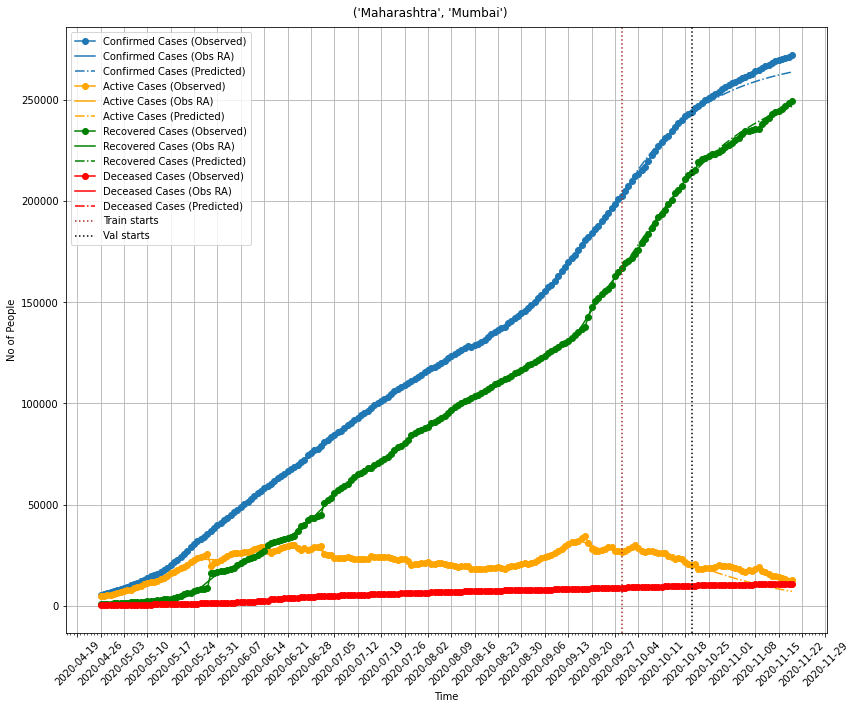

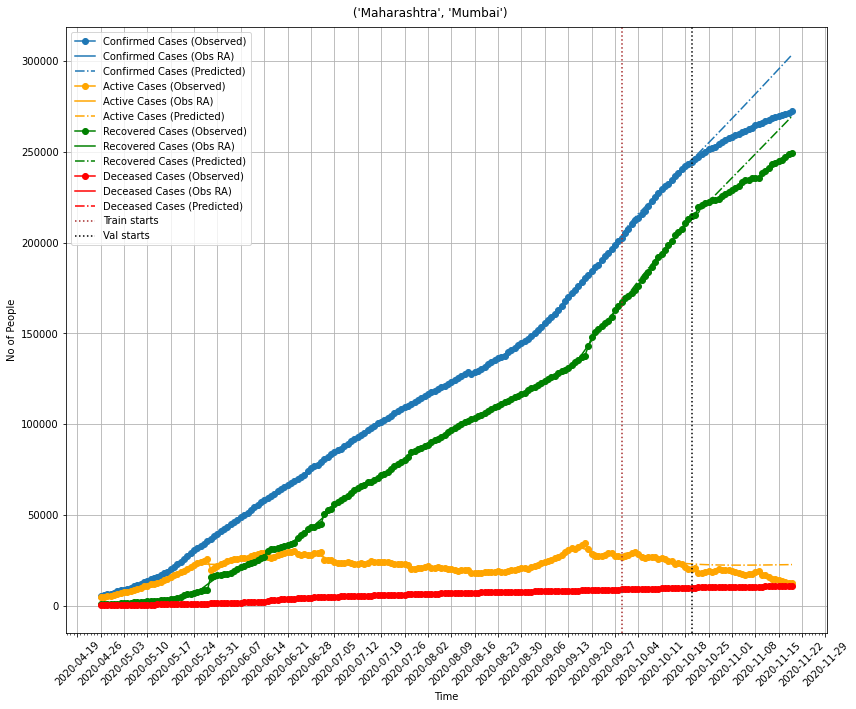

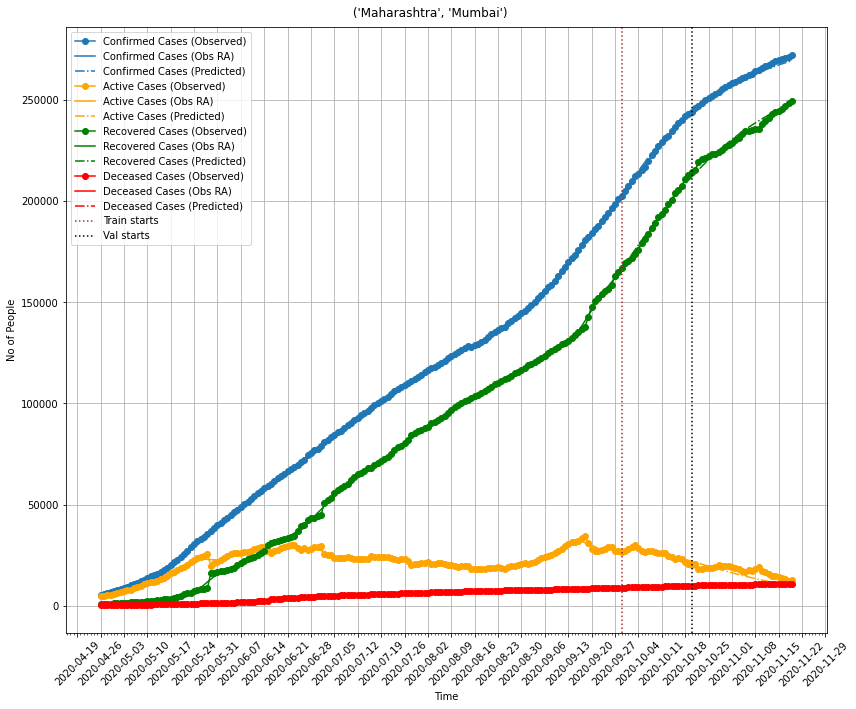

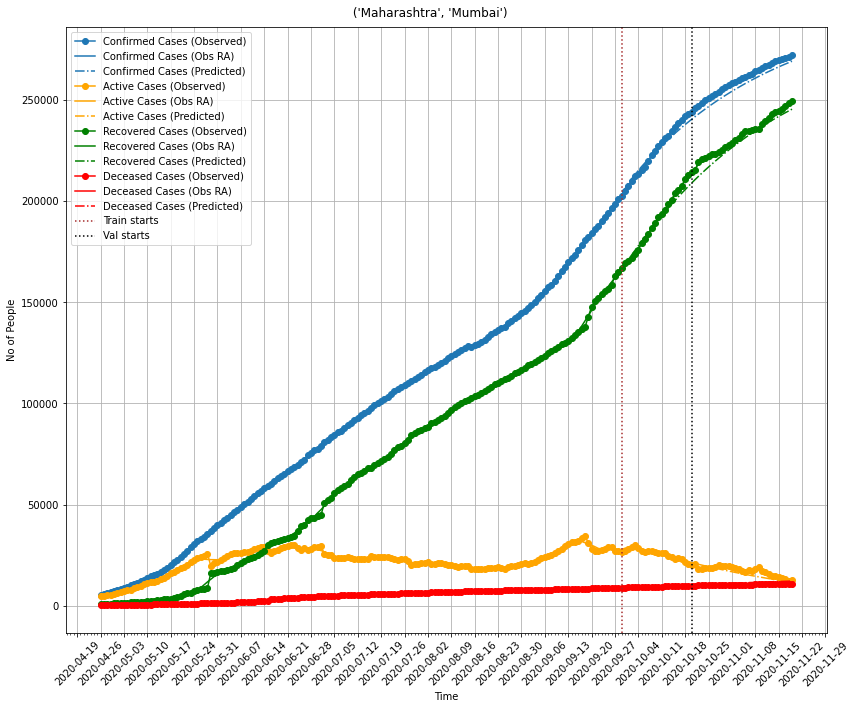

In [5]:
runs = 10
mcmc_P = []
bo_P = []
mcmc_perc_loss = []
bo_perc_loss = []
k = []
for n in range(runs):
    percentile_dict1 = {}
    percentile_dict2 = {}
    percentile_dict1['m1'] = single_fitting_cycle(**copy.deepcopy(config1['fitting']))
    percentile_dict2['m1'] = single_fitting_cycle(**copy.deepcopy(config2['fitting']))
    percentile_dict1['m1']['forecasts'] = {}
    percentile_dict1['m1']['forecasts']['best'] = get_forecast(percentile_dict1, train_fit='m1', 
                                                            model=config1['fitting']['model'], 
                                                            days=config1['forecast']['forecast_days'])

    percentile_dict1['m1']['trials_processed'] = forecast_all_trials(percentile_dict1, train_fit='m1', 
                                                                    model=config1['fitting']['model'], 
                                                                    forecast_days=config1['forecast']['forecast_days'])
    percentile_dict2['m1']['forecasts'] = {}
    percentile_dict2['m1']['forecasts']['best'] = get_forecast(percentile_dict2, train_fit='m1', 
                                                            model=config2['fitting']['model'], 
                                                            days=config2['forecast']['forecast_days'])

    percentile_dict2['m1']['trials_processed'] = forecast_all_trials(percentile_dict2, train_fit='m1', 
                                                                    model=config2['fitting']['model'], 
                                                                    forecast_days=config2['forecast']['forecast_days'])

    uncertainty_args1 = {'predictions_dict': percentile_dict1, **config1['uncertainty']['uncertainty_params']}
    uncertainty1 = config1['uncertainty']['method'](**uncertainty_args1)
    uncertainty_args2 = {'predictions_dict': percentile_dict2, **config2['uncertainty']['uncertainty_params']}
    uncertainty2 = config2['uncertainty']['method'](**uncertainty_args2)
    uncertainty_forecasts1 = uncertainty1.get_forecasts()
    uncertainty_forecasts2 = uncertainty2.get_forecasts()
    mcmc = []
    bo = []
    key = []
    for i in uncertainty_forecasts1.keys():
        key.append(i)
        mcmc.append(uncertainty_forecasts1[i]['df_loss_perc'].mean())
        bo.append(uncertainty_forecasts2[i]['df_loss_perc'].mean())
    k = key
    mcmc_perc_loss.append(mcmc)
    bo_perc_loss.append(bo)
    mcmc_P.append(uncertainty1.p_val)
    bo_P.append(uncertainty2.p_val)
    

In [5]:
percentile_dict1 = {}
percentile_dict2 = {}

Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_20112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0            | 241935.0            | 243169.0   

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 8/1500 [00:00<00:20, 73.71it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.5435241403582558,
    'I_hosp_ratio': 1.3192108196037755,
    'P_fatal': 1.298715643358172,
    'T_inc': 1.0518864029533637,
    'T_inf': 1.3258508749192317,
    'T_recov': 1.2133157417308138,
    'T_recov_fatal': 1.3974870772597348,
    'lockdown_R0': 1.0382645791042378,
    'sigma': 5.943711428240654}


100%|██████████| 1500/1500 [00:17<00:00, 85.40it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.8382519151697913), ('T_inc', 4.031458644952099), ('T_inf', 3.8319714252657695), ('T_recov', 10.587175947070351), ('T_recov_fatal', 32.91255087144158), ('P_fatal', 0.043945182272098905), ('E_hosp_ratio', 0.23727353623923852), ('I_hosp_ratio', 0.4402692308640674), ('sigma', 2.8034970039523843)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_20112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharash

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 500/500 [00:15<00:00, 31.77trial/s, best loss: 0.9846127831918507]
best parameters
 {'E_hosp_ratio': 0.23312422249918877, 'I_hosp_ratio': 0.4123415584453204, 'P_fatal': 0.03973465727490741, 'T_inc': 4.898627136256456, 'T_inf': 3.5701257750030146, 'T_recov': 10.612426161008555, 'T_recov_fatal': 33.180347033163265, 'lockdown_R0': 0.9182725582507328}


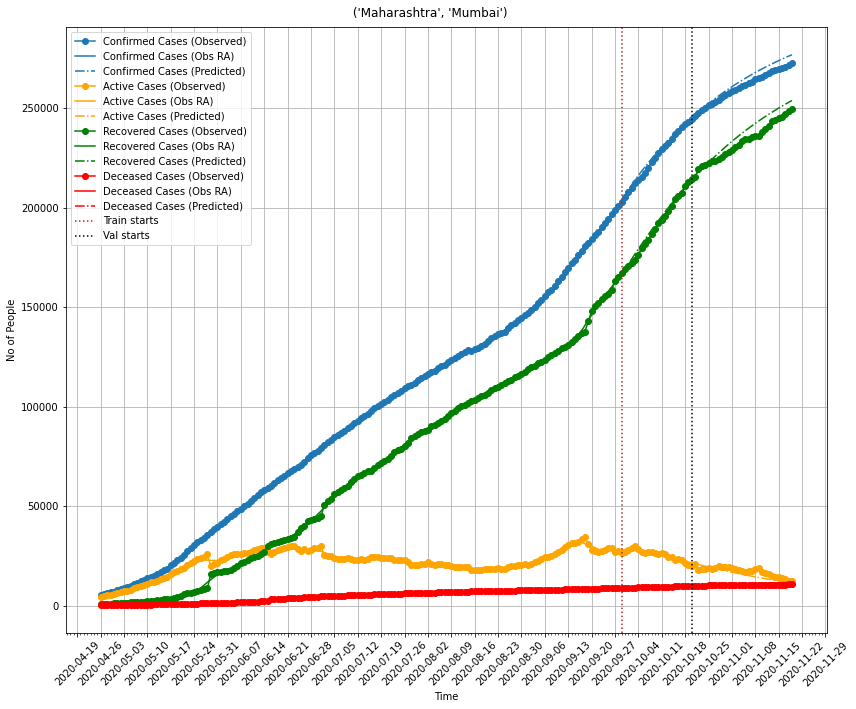

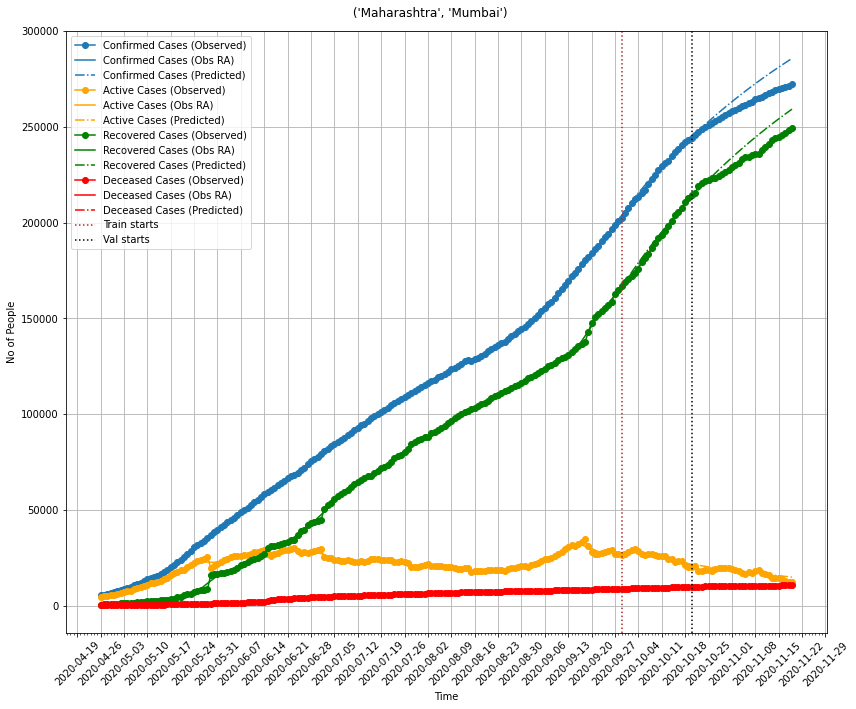

In [6]:
percentile_dict1['m1'] = single_fitting_cycle(**copy.deepcopy(config1['fitting']))
percentile_dict2['m1'] = single_fitting_cycle(**copy.deepcopy(config2['fitting']))

In [7]:
for i in percentile_dict1['m1'].keys():
    print(i)

plots
best_params
default_params
variable_param_ranges
optimiser
df_prediction
df_district
df_train
df_val
df_loss
trials
data_last_date
smoothing_description
df_district_unsmoothed
run_params


In [8]:
percentile_dict1['m1']['df_loss']
from main.seir.forecast import _get_top_k_trials as topk
_,loss = topk(percentile_dict1['m1'], k = 10)
loss

array([0.78997242, 0.78997242, 0.80069202, 0.80069202, 0.80069202,
       0.80069202, 0.80069202, 0.80069202, 0.80069202, 0.80069202])

In [9]:
percentile_dict1['m1']['df_loss']
from main.seir.forecast import _get_top_k_trials as topk
_,loss = topk(percentile_dict2['m1'], k = 10)
loss

array([0.98461278, 1.01811087, 1.09040273, 1.30240227, 1.33159293,
       1.40748774, 1.45753959, 1.57900372, 1.60090976, 1.63899617])

In [10]:
percentile_dict2['m1']['df_loss']

,train,val
total,0.356094,0.466962
active,3.51639,10.4832
recovered,0.761374,0.43524
deceased,0.286263,0.164389


In [11]:
percentile_dict1['m1']['forecasts'] = {}
percentile_dict1['m1']['forecasts']['best'] = get_forecast(percentile_dict1, train_fit='m1', 
                                                           model=config1['fitting']['model'], 
                                                           days=config1['forecast']['forecast_days'])

percentile_dict1['m1']['trials_processed'] = forecast_all_trials(percentile_dict1, train_fit='m1', 
                                                                 model=config1['fitting']['model'], 
                                                                 forecast_days=config1['forecast']['forecast_days'])

0it [00:00, ?it/s]

getting forecasts ..
getting forecasts ..


1500it [00:12, 120.54it/s]


In [12]:
percentile_dict2['m1']['forecasts'] = {}
percentile_dict2['m1']['forecasts']['best'] = get_forecast(percentile_dict2, train_fit='m1', 
                                                           model=config2['fitting']['model'], 
                                                           days=config2['forecast']['forecast_days'])

percentile_dict2['m1']['trials_processed'] = forecast_all_trials(percentile_dict2, train_fit='m1', 
                                                                 model=config2['fitting']['model'], 
                                                                 forecast_days=config2['forecast']['forecast_days'])

13it [00:00, 127.63it/s]

getting forecasts ..
getting forecasts ..


500it [00:03, 133.70it/s]


In [13]:
uncertainty_args1 = {'predictions_dict': percentile_dict1, **config1['uncertainty']['uncertainty_params']}
uncertainty1 = config1['uncertainty']['method'](**uncertainty_args1)

In [ ]:
uncertainty_args2 = {'predictions_dict': percentile_dict2, **config2['uncertainty']['uncertainty_params']}
uncertainty2 = config2['uncertainty']['method'](**uncertainty_args2)

> /Users/avtansht/Desktop/Wadhwani/covid-modelling/main/seir/uncertainty/middleclass.py(203)find_beta()
-> variable_param_ranges[key] = getattr(hp, variable_param_ranges[key][1])(


In [ ]:
print("MCMC-",uncertainty1.p_val)
print("BO-",uncertainty2.p_val)

In [ ]:
uncertainty_forecasts1 = uncertainty1.get_forecasts()
uncertainty_forecasts2 = uncertainty2.get_forecasts()

In [ ]:
mcmc = []
bo = []
key = []
for i in uncertainty_forecasts1.keys():
    key.append(i)
    mcmc.append(uncertainty_forecasts1[i]['df_loss_perc'].mean())
    bo.append(uncertainty_forecasts2[i]['df_loss_perc'].mean())

In [ ]:
np.greater(mcmc,bo).sum()/len(mcmc)

In [ ]:
data = {"mcmc":mcmc,"bo":bo}
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches

In [ ]:
plt.figure(figsize= (15,7))
mc, = plt.plot(key,mcmc,markersize=12,label='MCMC',color='b')
plt.scatter(key,mcmc,color='b')
b, = plt.plot(key,bo,markersize=12,label = 'BO',color='r')
plt.scatter(key,bo,color='r')
plt.legend(handles = [mc,b])
plt.xlabel('Percentiles')
plt.ylabel('Loss in Total compartment')

In [ ]:
np.linspace(0,100,40)